In [1]:
# Deixando os plots interativos
%matplotlib widget

import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from glob import glob

In [2]:
data_files = glob("/data2/camilacl/git/amazon-storms-aerosols/data/meteo/sondewnpn/maosondewnpnM1.b1.*.cdf")
soundings = xr.open_mfdataset(data_files)
# soundings = xr.open_dataset("/data2/camilacl/git/amazon-storms-aerosols/data/meteo/sondewnpn/maosondewnpnM1.b1.20140101.054700..20151201.052700.custom.cdf")

In [3]:
soundings

<xarray.Dataset>
Dimensions:      (time: 8188605)
Coordinates:
  * time         (time) datetime64[ns] 2014-01-01T05:47:00 ... 2015-12-01T06:...
Data variables: (12/25)
    base_time    (time) datetime64[ns] 2014-01-01 2014-01-01 ... 2015-12-01
    time_offset  (time) datetime64[ns] dask.array<chunksize=(1945,), meta=np.ndarray>
    qc_time      (time) int32 dask.array<chunksize=(1945,), meta=np.ndarray>
    pres         (time) float32 dask.array<chunksize=(1945,), meta=np.ndarray>
    qc_pres      (time) int32 dask.array<chunksize=(1945,), meta=np.ndarray>
    tdry         (time) float32 dask.array<chunksize=(1945,), meta=np.ndarray>
    ...           ...
    wstat        (time) float32 dask.array<chunksize=(1945,), meta=np.ndarray>
    asc          (time) float32 dask.array<chunksize=(1945,), meta=np.ndarray>
    qc_asc       (time) int32 dask.array<chunksize=(1945,), meta=np.ndarray>
    lat          (time) float32 dask.array<chunksize=(1945,), meta=np.ndarray>
    lon          (time) float32 dask.array<chunksize=(1945,), meta=np.ndarray>
    alt          (time) float32 dask.array<chunksize=(1945,), meta=np.ndarray>
Attributes: (12/42)
    command_line:               sonde_ingest -s mao -f M1 -R -d
    process_version:            ingest-sonde-10.11-0.el5
    ingest_software:            ingest-sonde-10.11-0.el5
    dod_version:                sondewnpn-b1-2.0
    site_id:                    mao
    facility_id:                M1: Manacapuru, Amazonia, Brazil
    ...                         ...
    qc_bit_3_description:       Value is greater than the valid_max.
    qc_bit_3_assessment:        Bad
    qc_bit_4_description:       Difference between current and previous value...
    qc_bit_4_assessment:        Indeterminate
    zeb_platform:               maosondewnpnM1.b1
    history:                    created by user dsmgr on machine iron at 2014...

In [4]:
sdf = soundings.to_dataframe()

In [5]:
sdf.alt = sdf.alt / 1000
sdf.alt = sdf.alt.round(0)
sdf.base_time = sdf.time_offset.apply(lambda x: x.value)
# sdf.tdry = sdf.tdry.round(0)

<AxesSubplot:xlabel='base_time', ylabel='alt'>

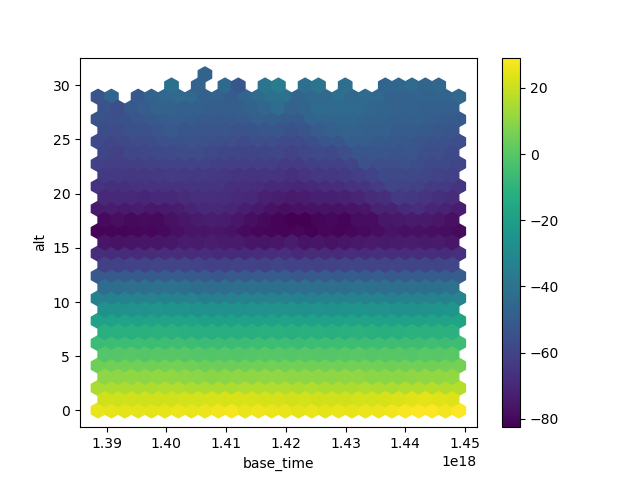

In [18]:
sdf.plot.hexbin(x="base_time", y="alt", C="tdry", gridsize=27, cmap="viridis")

In [6]:
sdf.groupby("alt").tdry.mean()

alt
0.0     26.032843
1.0     21.892115
2.0     15.611071
3.0     10.194491
4.0      4.854927
5.0     -0.521490
6.0     -5.917167
7.0    -11.735808
8.0    -18.121185
9.0    -25.248075
10.0   -32.921188
11.0   -41.040493
12.0   -49.399940
13.0   -57.741268
14.0   -65.717278
15.0   -72.793770
16.0   -78.046967
17.0   -79.904335
18.0   -76.870193
19.0   -72.603958
20.0   -68.800156
21.0   -65.840492
22.0   -63.114670
23.0   -60.316971
24.0   -57.717926
25.0   -55.150887
26.0   -52.729897
27.0   -50.357487
28.0   -48.174107
29.0   -46.412075
30.0   -46.143082
31.0   -47.427746
Name: tdry, dtype: float32

In [7]:
sdf2 = soundings.to_dataframe()
sdf2.alt = sdf2.alt / 1000
# sdf2.alt = sdf2.alt.round(0)
sdf2.base_time = sdf2.time_offset.apply(lambda x: x.value)
sdf2.tdry = sdf2.tdry.round(0)

In [8]:
sdf2.loc[sdf2.tdry == 0.].alt.max()

8.2775

Text(0.5, 1.0, 'T = 0°C')

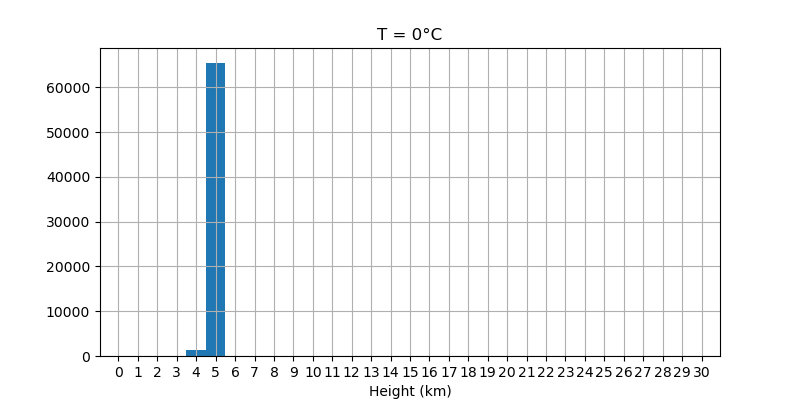

In [9]:
sdf2.loc[sdf2.tdry == 0.].hist(column="alt", figsize=(8,4), bins=np.arange(0.5, 30.5))
plt.xticks(np.arange(0,31))
plt.xlabel("Height (km)")
plt.title("T = 0°C")

Text(0.5, 1.0, 'T = -20°C')

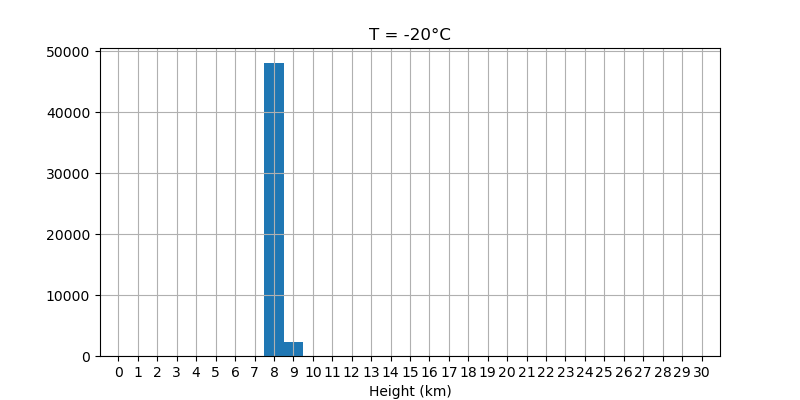

In [10]:
sdf2.loc[sdf2.tdry == -20.].hist(column="alt", figsize=(8,4), bins=np.arange(0.5, 30.5))
plt.xticks(np.arange(0,31))
plt.xlabel("Height (km)")
plt.title("T = -20°C")

Text(0.5, 1.0, 'T = -40°C')

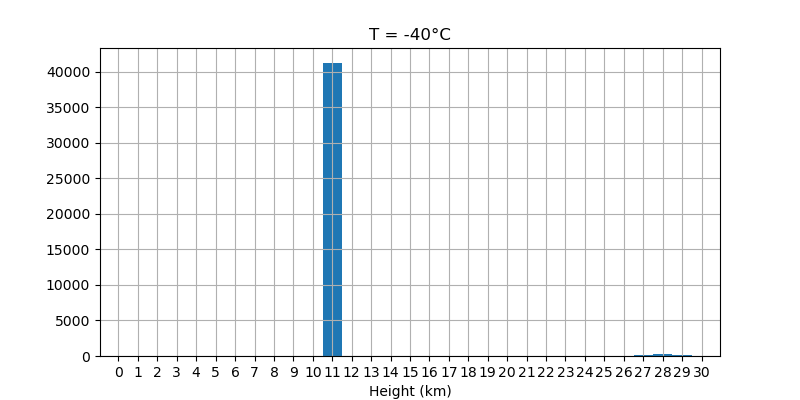

In [11]:
sdf2.loc[sdf2.tdry == -40.].hist(column="alt", figsize=(8,4), bins=np.arange(0.5, 30.5))
plt.xticks(np.arange(0,31))
plt.xlabel("Height (km)")
plt.title("T = -40°C")